# Example 2
# Graphical Examination and solving of a Linear Programming problem
## Green Tech Feasible Region

- GreenTech Electronics manufactures and sells two types of solar-powered
outdoor lights: the SunGlow and the EcoBeam.
- The owner and manager of the company, needs to decide how many of
each type of light to produce for the upcoming season.
- He sources pre-assembled light panels from a local supplier and adds solar
batteries and LED fixtures to complete the lights. (The supplier can provide an unlimited quantity of light panels.)

- He  uses the same type of solar battery for both models of lights. However, he will only have 200 solar batteries available during the next production season.
- The primary difference between the two models is the amount of wiring and assembly time required.
- Each SunGlow requires 9 hours of assembly time and 12 feet of wiring.
- Each EcoBeam requires 6 hours of assembly time and 16 feet of wiring.
- He has 1,566 assembly hours and 2,880 feet of wiring available during the season.
- He earns a profit of `$350` for each SunGlow he sells and `$300` for each EcoBeam he sells.
- The owner is confident that he can sell all the lights he produces.
- The question is, how many SunGlow and EcoBeam lights should David produce to maximize his profits for the upcoming season?

# Method 1
# everything in one code

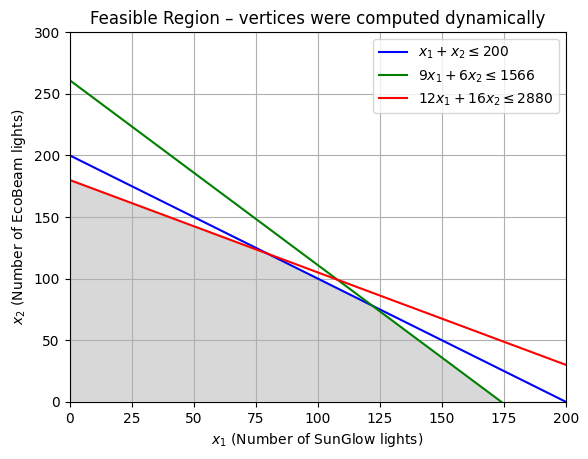

 The vertices of the solution space, 
[[ -0.  -0.]
 [174.  -0.]
 [122.  78.]
 [ 80. 120.]
 [  0. 180.]]
Solution:
Number of SunGlow lights (x1): 122
Number of EcoBeam lights (x2): 78
Maximum profit: $66100.0

Problem solved in 5 milliseconds
Problem solved in 2 iterations
Problem solved in 1 branch-and-bound nodes


In [ ]:
# !pip install ortools
import numpy as np
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp
from matplotlib.patches import Polygon
from itertools import combinations

def solve_max_profit():
    # Create the solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    if not solver:
        print('Solver not created!')
        return

    # Create variables
    x1 = solver.IntVar(0, solver.infinity(), 'x1')  # Number of SunGlow lights
    x2 = solver.IntVar(0, solver.infinity(), 'x2')  # Number of EcoBeam lights
    solver.Maximize(350 * x1 + 300 * x2)

    # Constraints:
    solver.Add(x1 + x2 <= 200)  # x1 + x2 <= 200 (Battery constraint)
    solver.Add(9 * x1 + 6 * x2 <= 1566)   # 9x1 + 6x2 <= 1566 (Labor constraint)
    solver.Add(12 * x1 + 16 * x2 <= 2880)  # 12x1 + 16x2 <= 2880 (Wiring constraint)
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print(f'Number of SunGlow lights (x1): {x1.solution_value():0.0f}')
        print(f'Number of EcoBeam lights (x2): {x2.solution_value():0.0f}')
        print(f'Maximum profit: ${solver.Objective().Value()}')
        print()
        print(f"Problem solved in {solver.wall_time():d} milliseconds")
        print(f"Problem solved in {solver.iterations():d} iterations")
        print(f"Problem solved in {solver.nodes():d} branch-and-bound nodes")
    else:
        print('The problem does not have an optimal solution.')

# 1) Define your constraints in the matrix form Ax <= b
#    We have variables [x1, x2] and these constraints:
#    x1 + x2 <= 200 (Battery constraint)
#    9x1 + 6x2 <= 1566 (Labor constraint)
#    12x1 + 16x2 <= 2880 (Wiring constraint)
#    x1 >= 0
#    x2 >= 0

def define_constraints():
    # Define constraints matrix A and vector b
    A = np.array([
    [1, 1],     #      x1 + x2 <= 200
    [9, 6],     #      9 x1 + 6 x2 <= 1566
    [12, 16],   #      12 x1 + 16 x2 <= 2880
    [-1, 0],    #     -x1 <= 0
    [0, -1],    #     -x2 <= 0
    ])
    b = np.array([200, 1566, 2880, 0, 0])
    return A, b

def intersect(row1, row2, rhs1, rhs2):
  # For each pair of constraints (i,j), solve A_i x = b_i, A_j x = b_j
    M = np.vstack([row1, row2])
    if abs(np.linalg.det(M)) < 1e-8:
        return None
    return np.linalg.solve(M, np.array([rhs1, rhs2]))

'''
The function below, iterates over all pairs of lines or planes represented by coefficients
in the `A` list and their corresponding constants in the `b` list.
It finds the intersection points of these lines or planes and returns an
array of all the intersection points found'''

def find_intersecting_points(A, b):
    candidates = []
    for (i, j) in combinations(range(len(A)), 2):
        pt = intersect(A[i], A[j], b[i], b[j])
        if pt is not None:
            candidates.append(pt)

    return np.array(candidates)


def find_feasible_points(A, b):
    # Find feasible points that satisfy all constraints
    tol = 1e-6
    feasible = []
    for x in candidates:
        if np.all(A.dot(x) <= b + tol):
            feasible.append(x)
    return np.unique(feasible, axis=0)


def sort_points_around_centroid(feasible):
    # Sort the feasible points around the centroid
    centroid = feasible.mean(axis=0)
    angles = np.arctan2(feasible[:, 1] - centroid[1], feasible[:, 0] - centroid[0])
    order = np.argsort(angles)
    return feasible[order]

def plot_feasible_region(vertices):
    x = np.linspace(0, 200, 200)
    plt.plot(x, (200 - x), label=r'$x_1 + x_2 \leq 200$', color='blue')
    plt.plot(x, (1566 - 9 * x) / 6, label=r'$9x_1 + 6x_2 \leq 1566$', color='green')
    plt.plot(x, (2880 - 12 * x) / 16, label=r'$12x_1 + 16x_2 \leq 2880$', color='red')

    poly = Polygon(vertices, closed=True, alpha=0.3, facecolor='gray')
    plt.gca().add_patch(poly)

    plt.xlim(0, 200)
    plt.ylim(0, 300)
    plt.legend()
    plt.xlabel(r'$x_1$ (Number of SunGlow lights)')
    plt.ylabel(r'$x_2$ (Number of EcoBeam lights)')
    plt.title("Feasible Region – vertices were computed dynamically")
    plt.grid(True)
    plt.show()



if __name__ == '__main__':

    A, b = define_constraints()
    candidates = find_intersecting_points(A, b)
    feasible = find_feasible_points(A, b)
    vertices = sort_points_around_centroid(feasible)
    plot_feasible_region(vertices)
    print(f" The vertices of the solution space: \n{vertices}")
    solve_max_profit()


# Modular code
## `main.py, model.py, utils.py, __init__.py`
# model.py

In [ ]:
# model.py
import numpy as np
from ortools.linear_solver import pywraplp

def solve_max_profit():
    solvers = ['SCIP', 'CBC', 'GLOP', 'SAT', 'CLP'] # for multiple reasons a slover maynot be available (dependencies, etc.)
    solver = None  # alternatively you can use: solver = pywraplp.Solver()
    for s in solvers:
        solver = pywraplp.Solver.CreateSolver(s)
        if solver:
            print(f'\nUsing {s} solver')
            break

    if not solver:
        raise RuntimeError("No OR-Tools solvers available")

    # Decision variables
    x1 = solver.IntVar(0, solver.infinity(), 'x1')
    x2 = solver.IntVar(0, solver.infinity(), 'x2')
    # Objective
    solver.Maximize(350 * x1 + 300 * x2)
    # Constraints
    solver.Add(x1 + x2 <= 200)
    solver.Add(9 * x1 + 6 * x2 <= 1566)
    solver.Add(12 * x1 + 16 * x2 <= 2880)
    status = solver.Solve()
    if status != pywraplp.Solver.OPTIMAL:
        print("No optimal solution found.")
        return
    result = {
        'x1': x1.solution_value(),
        'x2': x2.solution_value(),
        'profit': solver.Objective().Value(),
        'wall_time_ms': solver.wall_time(),
        'iterations': solver.iterations(),
        'nodes': solver.nodes()
    }
    return result


# utils.py

In [ ]:
# utils.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from itertools import combinations

# 1) Define your constraints in the matrix form Ax <= b
#    We have variables [x1, x2] and these constraints:
#    x1 + x2 <= 200 (Battery constraint)
#    9x1 + 6x2 <= 1566 (Labor constraint)
#    12x1 + 16x2 <= 2880 (Wiring constraint)
#    x1 >= 0
#    x2 >= 0

def define_constraints():
    A = np.array([
        [ 1,  1],   # x1 + x2 <= 200
        [ 9,  6],   # 9x1 + 6x2 <= 1566
        [12, 16],   # 12x1 + 16x2 <= 2880
        [-1,  0],   # -x1 <= 0
        [ 0, -1],   # -x2 <= 0
    ])
    b = np.array([200, 1566, 2880, 0, 0])
    return A, b

# 2) row1, row2: length-2 arrays or lists containing the coefficients [a,b] and [c,d].
# rhs1, rhs2 are the right-hand-side scalars of the two equations.
# tol is a small tolerance to detect if the two lines are (nearly) parallel.
# we will be using a system of leq to find the intersections of every two lines
# a*x1 + b*x2 = rhs1
# c*x1 + d*x2 = rhs2
# pt = intersect([a, b], [c, d], rhs1, rhs2) , which can be seen in the find_intersecting_points() function

# function to find x1 and x2 of intersection of two lines
def intersect(row1, row2, rhs1, rhs2, tol=1e-8):
    M = np.vstack([row1, row2]) # stacks the two rows vertically to make a 2×2 matrix of coefficients
    if abs(np.linalg.det(M)) < tol: # If det(𝑀)≈0, the lines are parallel or coincident and there’s no unique intersection.
        return None
    return np.linalg.solve(M, np.array([rhs1, rhs2])) # it solves matrix equation x = M^-1 y


# 3) A is a 2D NumPy array of shape (𝑚,2) and b is a 1D NumPy array of length m
# Example with m=4 constraints:
# Iteration 1: i=0, j=1  → intersect(A[0], A[1], b[0], b[1])
# Iteration 2: i=0, j=2  → intersect(A[0], A[2], b[0], b[2])
# ...
# Iteration 5: i=2, j=3  → intersect(A[2], A[3], b[2], b[3])
def find_intersecting_points(A, b):
    candidates = []
    for i, j in combinations(range(len(A)), 2): # The length of a 2D array `A` in Python is the number of rows in the array.
        pt = intersect(A[i], A[j], b[i], b[j])
        if pt is not None:
            candidates.append(pt)
    return np.array(candidates) #  we convert the Python list of 2-element arrays into a single NumPy array of shape (N, 2)


# 4) its job is to take a collection of candidate intersection points and filter out only those that satisfy all the original linear inequalities
#
def find_feasible_points(A, b, candidates, tol=1e-6): # tol is a small tolerance to account for floating-point round-off when checking inequalities
    feasible = []
    for x in candidates:
        if np.all(A.dot(x) <= b + tol): # computes the vector of left-hand-sides for all constraints.np.All(...)  returns True if and only if every constraint holds
            feasible.append(x)
    return np.unique(feasible, axis=0) # A filtered, sorted array of those candidate points that actually lie within (or on) the feasible polygon


# 5) This function takes an array of 2D points and returns them re-ordered
# so that they lie around their own center, in counter-clockwise (CCW) order.
# This is crucial if you want to draw a clean polygon by “connecting the dots".
# Imagine placing the tip of a protractor at the centroid.
# For each point, measure the angle from the horizontal axis.
# Then draw the points in order of increasing angle

def sort_points_around_centroid(points):
    centroid = points.mean(axis=0) # points.mean(axis=0) averages each column to get the cneter of mass of your point cloud
    angles = np.arctan2(points[:,1] - centroid[1], points[:,0] - centroid[0]) # np.arctan2( Δy for each point, Δx for each point)
    return points[np.argsort(angles)]



def plot_feasible_region(vertices):
    x = np.linspace(0, 200, 400)
    plt.plot(x, (200 - x),       label=r'$x_1 + x_2 \leq 200$', color='blue')
    plt.plot(x, (1566 - 9*x)/6,  label=r'$9x_1 + 6x_2 \leq 1566$', color='green')
    plt.plot(x, (2880 - 12*x)/16, label=r'$12x_1 + 16x_2 \leq 2880$', color='red')
    poly = Polygon(vertices, closed=True, alpha=0.3, facecolor='gray')
    plt.gca().add_patch(poly)
    plt.xlim(0, 200); plt.ylim(0, max(vertices[:,1]) * 1.1)
    # max(vertices[:,1]) is used to find the maximum value in the second column (index 1) of the `vertices` array or dataset.
    plt.legend(); plt.grid(True)
    plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$')
    plt.title("Feasible Region (dynamically computed)")
    plt.show()


# main.py

In [ ]:
from model import solve_max_profit
from utils import (
    define_constraints,
    find_intersecting_points,
    find_feasible_points,
    sort_points_around_centroid,
    plot_feasible_region
)
# When you import functions without (), you’re bringing the function objects themselves into your current namespace. In Python:
# Names without parentheses refer to the object (e.g. the function itself).
# You need a reference to the function, not its result, so that later in your code you can call it whenever you need:

def main():
    # 1. Compute and plot feasible region
    A, b = define_constraints()
    candidates = find_intersecting_points(A, b)
    feasible = find_feasible_points(A, b, candidates)
    vertices = sort_points_around_centroid(feasible)
    print("Feasible vertices:\n", vertices)
    plot_feasible_region(vertices)

    # 2. Solve the max-profit IP
    result = solve_max_profit()
    if result:
        print("\nOptimal solution:")
        print(f"  x1 = {result['x1']:.0f}")
        print(f"  x2 = {result['x2']:.0f}")
        print(f"  Profit = ${result['profit']:.0f}")
        print(f"  (Solved in {result['wall_time_ms']} ms, "
              f"{result['iterations']} iterations, "
              f"{result['nodes']} nodes)")

if __name__ == "__main__":
    main()


# Example 2
# Method 2 (slightly different that previous method)

# Graphical examination of a Linear Programming problem
## Green Tech Feasible Region


Solution:
Number of SunGlow lights (x1): 122
Number of EcoBeam lights (x2): 78
Maximum profit: $66100.0

Problem solved in 0 milliseconds
Problem solved in 3 iterations
Problem solved in -1 branch-and-bound nodes


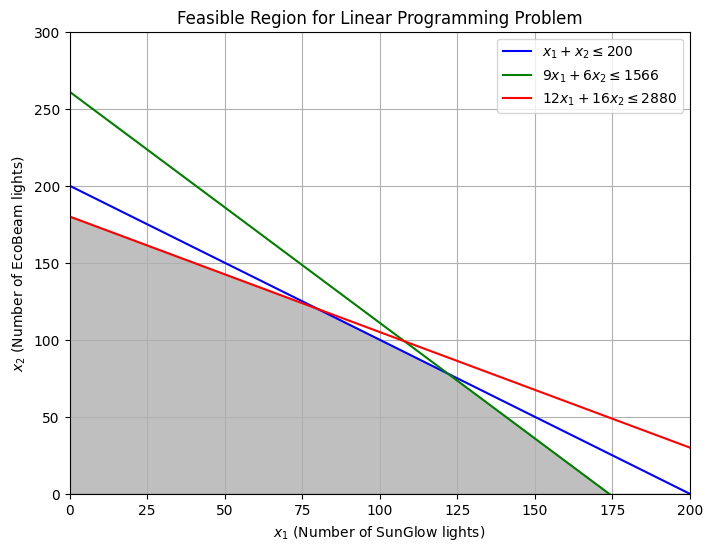

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp

def solve_max_profit():
    # Create the solver (GLOP is the linear programming solver)
    solver = pywraplp.Solver.CreateSolver('GLOP')

    if not solver:
        print('Solver not created!')
        return

    # Create variables
    x1 = solver.IntVar(0.0, solver.infinity(), 'x1')  # Number of SunGlow lights
    x2 = solver.IntVar(0.0, solver.infinity(), 'x2')  # Number of EcoBeam lights

    # Objective: Maximize profit (350x1 + 300x2)
    solver.Maximize(350 * x1 + 300 * x2)

    # Constraints:
    # x1 + x2 <= 200 (Battery constraint)
    solver.Add(x1 + x2 <= 200)

    # 9x1 + 6x2 <= 1566 (Labor constraint)
    solver.Add(9 * x1 + 6 * x2 <= 1566)

    # 12x1 + 16x2 <= 2880 (Wiring constraint)
    solver.Add(12 * x1 + 16 * x2 <= 2880)

    # Solve the problem
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print(f'Number of SunGlow lights (x1): {x1.solution_value():0.0f}')
        print(f'Number of EcoBeam lights (x2): {x2.solution_value():0.0f}')
        print(f'Maximum profit: ${solver.Objective().Value()}')
        print()
        print(f"Problem solved in {solver.wall_time():d} milliseconds")
        print(f"Problem solved in {solver.iterations():d} iterations")
        print(f"Problem solved in {solver.nodes():d} branch-and-bound nodes")
    else:
        print('The problem does not have an optimal solution.')

if __name__ == '__main__':
    solve_max_profit()


# Constraints:
# 1. x1 + x2 <= 200 (Battery constraint)
# 2. 9x1 + 6x2 <= 1566 (Labor constraint)
# 3. 12x1 + 16x2 <= 2880 (Wiring constraint)

# Create a range of x1 (number of SunGlow lights)
x1 = np.linspace(0, 200, 200)

# Plot the constraints:
# For constraint 1: x1 + x2 <= 200 => x2 <= 200 - x1
x2_1 = 200 - x1 #blue line

# For constraint 2: 9x1 + 6x2 <= 1566 => x2 <= (1566 - 9x1) / 6
x2_2 = (1566 - 9 * x1) / 6  # green line

# For constraint 3: 12x1 + 16x2 <= 2880 => x2 <= (2880 - 12x1) / 16
x2_3 = (2880 - 12 * x1) / 16  # red line

# Plot the constraints
plt.figure(figsize=(8, 6))

plt.plot(x1, x2_1, label=r'$x_1 + x_2 \leq 200$', color='blue')
plt.plot(x1, x2_2, label=r'$9x_1 + 6x_2 \leq 1566$', color='green')
plt.plot(x1, x2_3, label=r'$12x_1 + 16x_2 \leq 2880$', color='red')

# Fill feasible area (intersection of all constraints)
# plt.fill_between(x1, np.maximum(np.maximum(0, x2_1), np.maximum(x2_2, x2_3)), color='gray', alpha=0.5)
plt.fill_between(x1, np.minimum(np.minimum(x2_1, x2_2), np.minimum(x2_1, x2_3), np.minimum(x2_2, x2_3)), color='gray', alpha=0.5)

# Labels and title
plt.xlim(0, 200)
plt.ylim(0, 300)

plt.xlabel('$x_1$ (Number of SunGlow lights)')
plt.ylabel('$x_2$ (Number of EcoBeam lights)')
plt.title('Feasible Region for Linear Programming Problem')
plt.legend()

plt.grid(True)
plt.show()
